# Regression Analysis on COCOMO dataset

Applying multiple linear regression, Ridge Regression, LASSO on the cocomo dataset.

In [54]:
# Required Modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

## Custom functions

In [55]:
# Functions which we will be used multiple times across the notebooks

def plot(y_train, y_test, y_train_pred, y_test_pred):
    plt.grid(True)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.scatter(y_train, y_train_pred, label='train')
    plt.scatter(y_test, y_test_pred, label='test')
    plt.legend()

In [56]:
# Loading the data

data = pd.read_csv('../data/cocomo81.csv')
data.head()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [57]:
# Separating out features and labels

X = data.loc[:, data.columns != 'actual']
y = data[['actual']]

In [58]:
# MinMax scaling

# Scaling the feature set
scale_features = MinMaxScaler()
scale_features.fit(X)
scaled_X = scale_features.transform(X)

# Scaling the labels
scale_labels = MinMaxScaler()
scale_labels.fit(y)
scaled_y = scale_labels.transform(y)

In [59]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.20, random_state=88)

In [60]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
reg.coef_

array([[ 0.06515983, -0.00307067,  0.06361292, -0.01718152, -0.03100195,
         0.03965725,  0.00449169, -0.0335227 , -0.00515435,  0.09369969,
         0.01949414,  0.02718628,  0.05109889, -0.04393687, -0.00657376,
         1.11627876]])

Training Error:  0.0013543018152334086
Testing Error:  0.07222733971033612


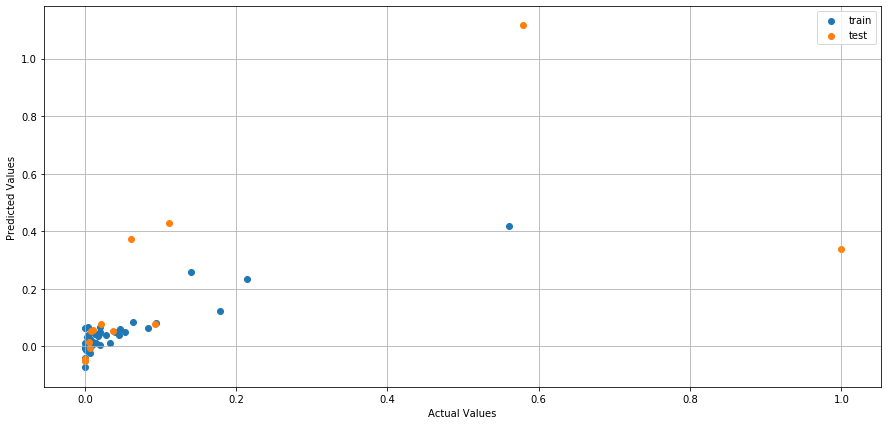

In [62]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("Training Error: ", mean_squared_error(y_train, y_train_pred))
print("Testing Error: ", mean_squared_error(y_test, y_test_pred))

plot(y_train, y_test, y_train_pred, y_test_pred)

## Regularization
Introducing regularization to select important features
* Ridge
* LASSO

One of the machine learning technique which is used for feature engineering.

### Ridge Regression

L2 norm

Training Error:  0.0031408647910898344
Testing Error:  0.06681016584273983


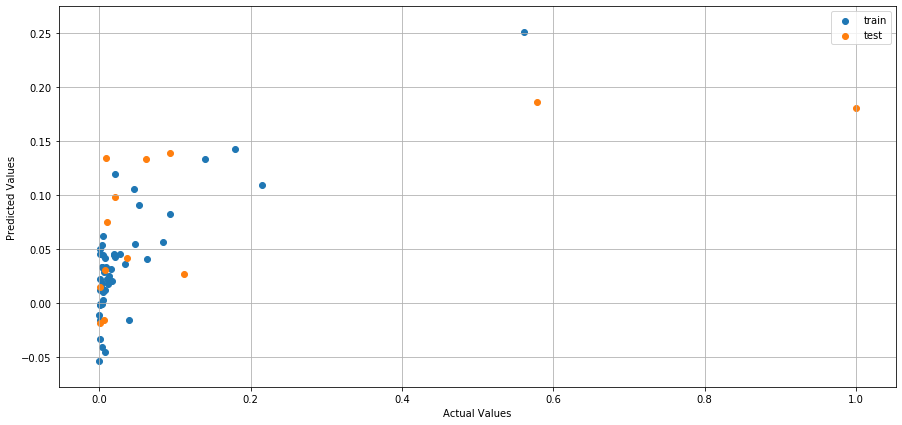

In [50]:
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("Training Error: ", mean_squared_error(y_train, y_train_pred))
print("Testing Error: ", mean_squared_error(y_test, y_test_pred))

plot(y_train, y_test, y_train_pred, y_test_pred)

In [49]:
reg.coef_

array([[ 3.16726483e-05,  6.23823711e-05,  4.59365080e-06,
         6.20076091e-06,  1.10313355e-05,  2.32060175e-05,
         3.14264029e-05, -1.00370153e-05, -9.73858756e-06,
         2.11099093e-05,  2.27936241e-05,  2.29398954e-05,
         3.92765630e-05, -4.69505802e-06,  7.69129143e-06,
         2.04599384e-05]])

### LASSO

L1 norm

Training Error:  0.007047230345962565
Testing Error:  0.09188647198389054


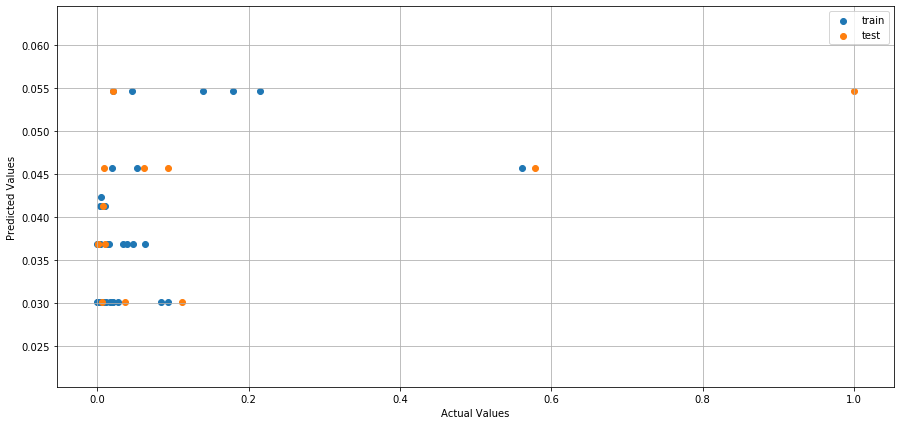

In [53]:
reg = Lasso(alpha=0.01)
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("Training Error: ", mean_squared_error(y_train, y_train_pred))
print("Testing Error: ", mean_squared_error(y_test, y_test_pred))

plot(y_train, y_test, y_train_pred, y_test_pred)

In [30]:
reg.coef_

array([ 7.17073022e+02, -1.80373996e+00,  6.54025618e+02, -1.56639439e+02,
       -3.13519893e+02,  4.11013375e+02,  1.49334650e+01, -3.84340983e+02,
       -3.65952437e+01,  9.96898758e+02,  2.06922794e+02,  2.95729589e+02,
        5.77063025e+02, -4.07564274e+02, -5.88007976e+01,  3.28034765e+03])